<h2><font color="#07bdf5">1.Import the necessary libraries</font></h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h2><font color="#07bdf5">2.Read the data as a data frame</font></h2>

In [5]:
#Adding Header
header=['user_id','product_id','rating','timestamp']

In [6]:
elec_df=pd.read_csv('ratings_Electronics.csv',names=header)

In [7]:
elec_df.head()

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


<font color="07bdf5" style="font-family:courier;font-size:24px;">Observation:DataFrame loaded</font>

<h2><font color="#07bdf5">3.EDA - Exploratory Data Analytics</font></h2>

In [8]:
elec_df.shape

(7824482, 4)

In [9]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
user_id       object
product_id    object
rating        float64
timestamp     int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [10]:
# Check for missing value
elec_df.isna().sum()

user_id       0
product_id    0
rating        0
timestamp     0
dtype: int64

### Observation: There is no missing values

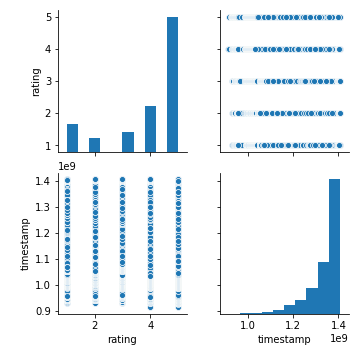

In [11]:
sns.pairplot(elec_df)